# 02 — Renda vs Desempenho (ENEM 2023)

Este notebook analisa a relação entre **renda familiar (Q006)** e **desempenho** no ENEM 2023.

**Premissas:**
- O arquivo `../data/interim/enem_2023.parquet` já foi gerado.
- Colunas mínimas: `NOTA_MEDIA_5`, `Q006`, `Q006_ord`.
- Colunas opcionais: `Q006_rot`, `TP_ESCOLA_rot`.


In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = Path("../data/interim/enem_2023.parquet")
print("Lendo:", DATA_PATH)
df = pd.read_parquet(DATA_PATH)
print("Dimensões:", df.shape)

required = ["NOTA_MEDIA_5", "Q006", "Q006_ord"]
missing = [c for c in required if c not in df.columns]
if missing:
    raise RuntimeError(f"Faltam colunas necessárias: {missing}.")

RENDA_ROT_COL = "Q006_rot" if "Q006_rot" in df.columns else None
TP_ESCOLA_ROT = "TP_ESCOLA_rot" if "TP_ESCOLA_rot" in df.columns else None

if "IN_TREINEIRO" in df.columns:
    df = df[df["IN_TREINEIRO"] == 0].copy()

df = df.dropna(subset=["NOTA_MEDIA_5", "Q006", "Q006_ord"]).copy()
df.head()

Lendo: ../data/interim/enem_2023.parquet
Dimensões: (2166843, 20)


,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_REDACAO,TP_ESCOLA,Q001,Q002,Q006,Q022,Q024,Q025,IN_TREINEIRO,NOTA_MEDIA_5,Q001_ord,Q002_ord,Q006_ord,Q022_ord,Q024_ord,Q025_ord
0,363.2,475.6,498.9,502.0,700.0,1,H,E,C,A,A,B,0,507.94,8,5,3,1,1,2
1,466.7,507.2,508.5,459.0,880.0,2,D,D,C,D,A,B,0,564.28,4,4,3,4,1,2
2,338.3,446.9,379.2,402.5,560.0,2,B,B,B,B,A,A,0,425.38,2,2,2,2,1,1
3,680.2,610.4,630.3,564.7,600.0,1,H,E,F,C,B,B,0,617.12,8,5,6,3,2,2
4,736.3,626.9,620.2,644.9,860.0,1,F,C,B,E,B,B,0,697.66,6,3,2,5,2,2


## 1) Distribuição de Renda (Q006) — Absoluta e Percentual

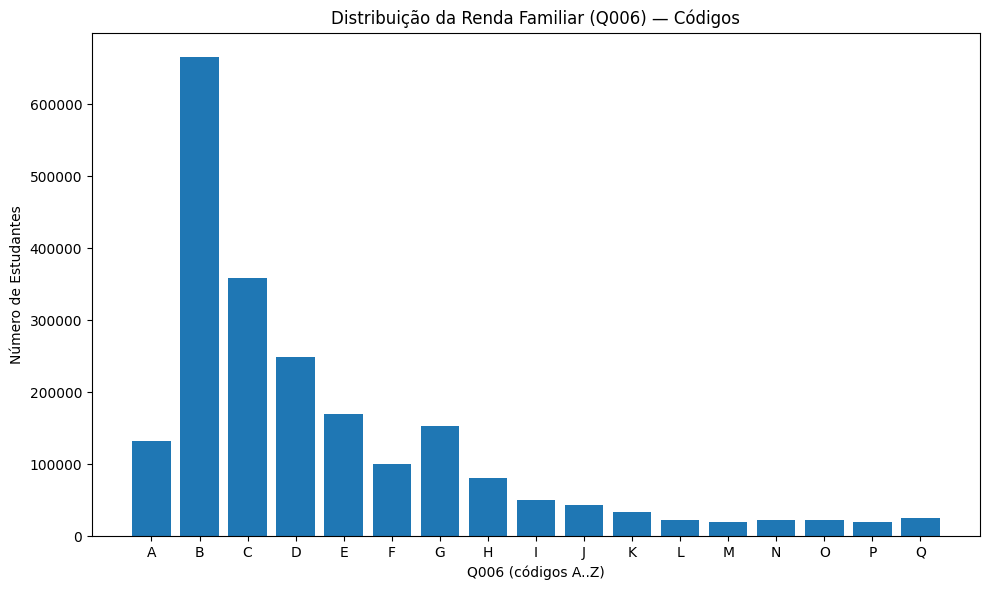

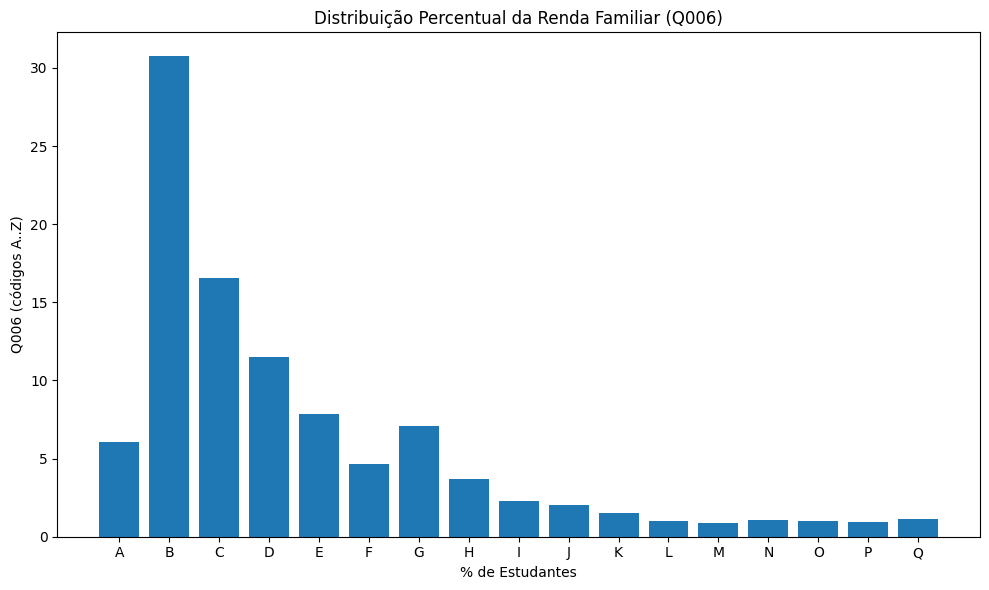

In [2]:
# Frequência absoluta
plt.figure(figsize=(10, 6))
if RENDA_ROT_COL:
    counts = df[RENDA_ROT_COL].value_counts().sort_index()
    plt.barh(counts.index, counts.values)
    plt.title("Distribuição da Renda Familiar (Q006) — Frequência Absoluta")
    plt.xlabel("Número de Estudantes")
    plt.ylabel("Faixa de Renda (rótulo)")
else:
    counts = df["Q006"].value_counts().sort_index()
    plt.bar(counts.index, counts.values)
    plt.title("Distribuição da Renda Familiar (Q006) — Códigos")
    plt.xlabel("Q006 (códigos A..Z)")
    plt.ylabel("Número de Estudantes")
plt.tight_layout()
plt.show()

# Percentual
plt.figure(figsize=(10, 6))
if RENDA_ROT_COL:
    pct = (df[RENDA_ROT_COL].value_counts(normalize=True).sort_index() * 100)
    plt.barh(pct.index, pct.values)
    plt.title("Distribuição Percentual da Renda Familiar (Q006)")
    plt.xlabel("% de Estudantes")
    plt.ylabel("Faixa de Renda (rótulo)")
else:
    pct = (df["Q006"].value_counts(normalize=True).sort_index() * 100)
    plt.bar(pct.index, pct.values)
    plt.title("Distribuição Percentual da Renda Familiar (Q006)")
    plt.xlabel("% de Estudantes")
    plt.ylabel("Q006 (códigos A..Z)")
plt.tight_layout()
plt.show()

## 2) Tendência da Nota Média por Faixa de Renda (ordem ordinal)

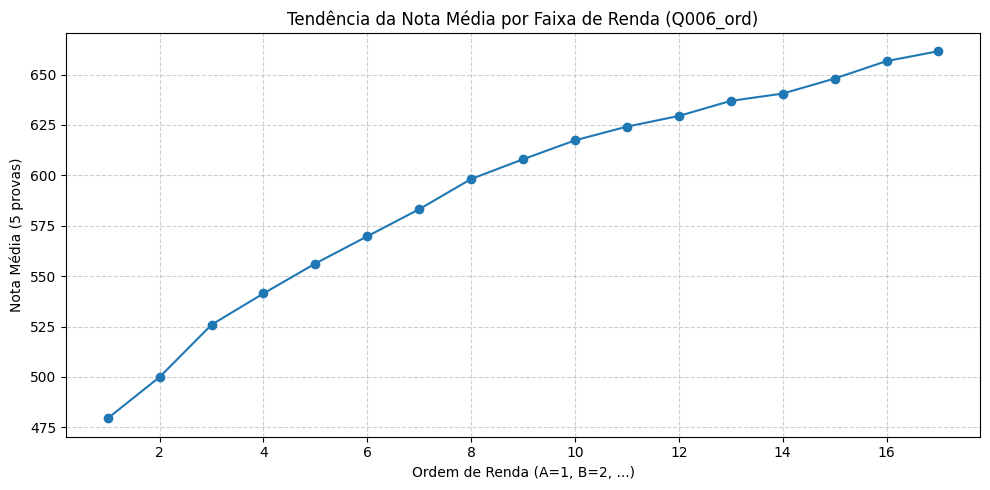

In [3]:
ord_df = df.groupby("Q006_ord", as_index=False)["NOTA_MEDIA_5"].mean().sort_values("Q006_ord")
plt.figure(figsize=(10, 5))
plt.plot(ord_df["Q006_ord"], ord_df["NOTA_MEDIA_5"], marker="o")
plt.title("Tendência da Nota Média por Faixa de Renda (Q006_ord)")
plt.xlabel("Ordem de Renda (A=1, B=2, ...)")
plt.ylabel("Nota Média (5 provas)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Versão com rótulos, se disponível
if RENDA_ROT_COL:
    tmp_lab = df[[RENDA_ROT_COL, "Q006_ord"]].dropna().drop_duplicates().sort_values("Q006_ord")
    x = list(tmp_lab["Q006_ord"])
    labs = list(tmp_lab[RENDA_ROT_COL])
    means = df.groupby("Q006_ord")["NOTA_MEDIA_5"].mean().reindex(x)

    plt.figure(figsize=(12, 5))
    plt.plot(labs, means.values, marker="o")
    plt.title("Tendência da Nota Média por Faixa de Renda (rótulos)")
    plt.xlabel("Faixa de Renda (Q006_rot)")
    plt.ylabel("Nota Média (5 provas)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

## 3) Boxplot da Nota Média por Faixa de Renda

/var/folders/hh/vmnnndmj6dn57jb4rc42xtww0000gn/T/ipykernel_56273/53128655.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


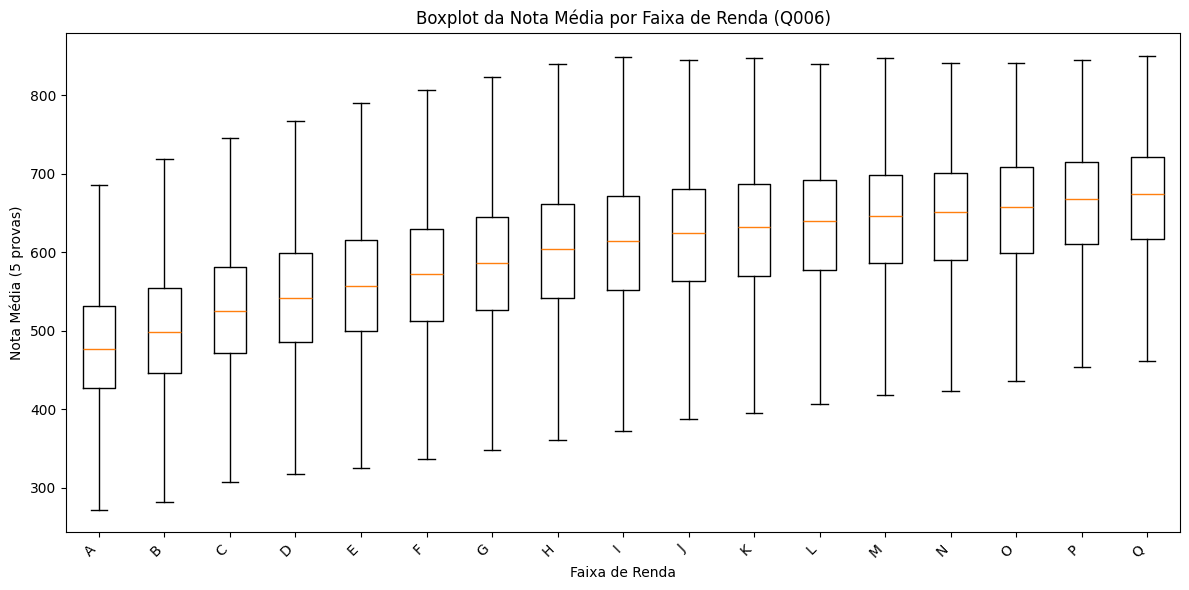

In [4]:
if RENDA_ROT_COL:
    order = df[[RENDA_ROT_COL, "Q006_ord"]].drop_duplicates().sort_values("Q006_ord")
    groups = [df.loc[df[RENDA_ROT_COL]==lab, "NOTA_MEDIA_5"].dropna().values for lab in order[RENDA_ROT_COL]]
    labels = list(order[RENDA_ROT_COL])
else:
    order = sorted(df["Q006"].dropna().unique())
    groups = [df.loc[df["Q006"]==lab, "NOTA_MEDIA_5"].dropna().values for lab in order]
    labels = order

plt.figure(figsize=(12, 6))
plt.boxplot(groups, labels=labels, showfliers=False)
plt.title("Boxplot da Nota Média por Faixa de Renda (Q006)")
plt.xlabel("Faixa de Renda")
plt.ylabel("Nota Média (5 provas)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 4) Correlação e Dispersão (Q006_ord × NOTA_MEDIA_5)

Correlação (Q006_ord vs NOTA_MEDIA_5): 0.460


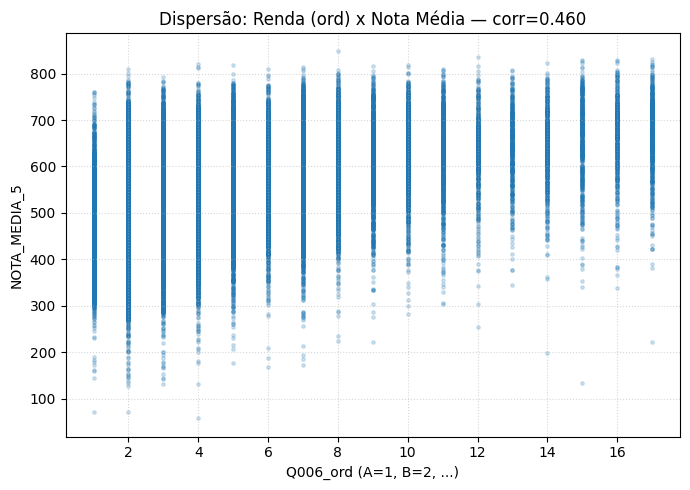

In [5]:
cor = df["Q006_ord"].corr(df["NOTA_MEDIA_5"])
print(f"Correlação (Q006_ord vs NOTA_MEDIA_5): {cor:.3f}")

sample = df.sample(min(50000, len(df)), random_state=42)
plt.figure(figsize=(7, 5))
plt.scatter(sample["Q006_ord"], sample["NOTA_MEDIA_5"], s=6, alpha=0.2)
plt.title(f"Dispersão: Renda (ord) x Nota Média — corr={cor:.3f}")
plt.xlabel("Q006_ord (A=1, B=2, ...)")
plt.ylabel("NOTA_MEDIA_5")
plt.grid(True, linestyle=":", alpha=0.5)
plt.tight_layout()
plt.show()

## 5) Observações para o relatório

- A distribuição de renda concentra-se nas faixas intermediárias; faixas altas são minoritárias.  
- A **nota média cresce** de forma monotônica com o aumento da renda (linha e boxplot).  
- A **correlação positiva** entre renda ordinal e nota média reforça esse padrão.  
- (Se estratificado por tipo de escola) a diferença tende a se manter, sugerindo que renda impacta independentemente do setor.
